In [409]:
# imports
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #https://www.dataquest.io/blog/large_files/pandas-cheat-sheet.pdf
import seaborn as sns
import itertools

In [289]:
# read input
import csv

filename = "data/train.csv"

df = pd.read_csv(filename)

with open(filename,'r') as csvfile:
    # Set the right quote character and delimiter
    csv_contents = [{k: v for k, v in row.items()}
        for row in csv.DictReader(csvfile, skipinitialspace=True, quotechar='"', delimiter=',')]
    
print("columns:")#, sorted(csv_contents[0].keys()))
col_no = 0
for col in sorted(csv_contents[0].keys()):
    print(col_no, col)
    col_no += 1

columns:
0 Age
1 Cabin
2 Embarked
3 Fare
4 Parch
5 PassengerId
6 Pclass
7 Sex
8 SibSp
9 Survived


In [352]:
# DATA CLEANING

# generate cabin known
df.CabinKnown = np.where(df.Cabin.notnull(), 1, 0)

# solve missing age problem
# for now maybe insert mean age, not optimal, instead should try to predict given other data


In [353]:
# First 5 records
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinKnown
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [301]:
# data distribution per numeric column
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [376]:
# Correlation Matrix
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinKnown
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.725541
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.249732
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.036987
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.482075
CabinKnown,0.019919,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,1.000000


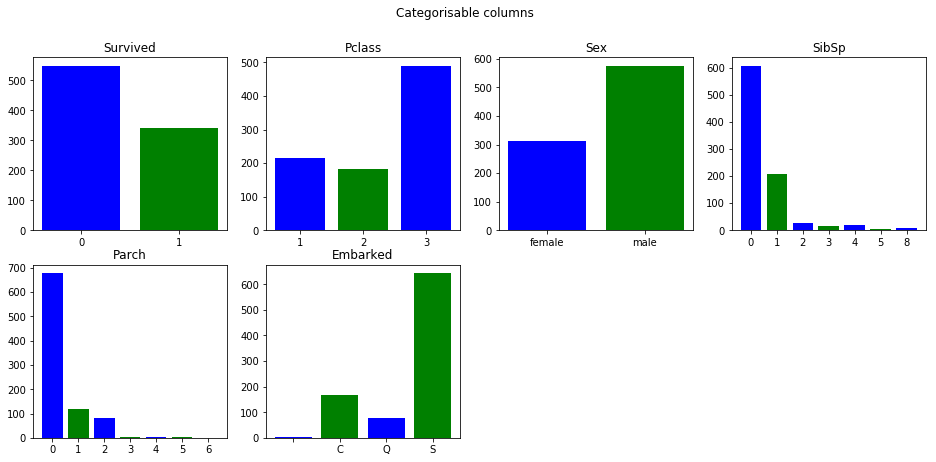

In [432]:
# bar chart of categorical columns
plt.figure(figsize=(16,7))
plt.suptitle("Categorisable columns")
cols = [c for c in list(df.columns) if c in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]

for i in range(len(cols)):
    col = [csv_contents[x][cols[i]] for x in range(len(csv_contents))]
    labels = sorted([x for x in set(col) ])#if len(x) > 0])
    sizes = [col.count(label) for label in labels]
#     explode = tuple(0.1 if s == max(sizes) else 0.0 for s in sizes)
    subplotno = (241 + i)
    plt.subplot(subplotno)
    plt.title(cols[i])
    plt.bar(labels, np.array(sizes), color="bg")
plt.show()

This shows that the only categorical column missing data is Embarked

In [434]:
# FARE analysis
print("Average fare of survivers: {}".format( df[df.Survived == 1].Fare.mean() ))
print("Average fare of non-survivers: {}".format( df[df.Survived == 0].Fare.mean() ))
print()

for src in df.Embarked.unique():
    if type(src) == float and math.isnan(src):
        continue
    print("Average fare of people from {}: {}".format(
        src,
        df[df.Embarked == src].Fare.mean()
    ))

df.groupby("Embarked")["Fare"].describe()

Average fare of survivers: 48.39540760233918
Average fare of non-survivers: 22.117886885245902

Average fare of people from S: 27.079811801242233
Average fare of people from C: 59.95414404761905
Average fare of people from Q: 13.276029870129872


,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
S,644.0,27.079812,35.887993,0.0000,8.05000,13.00,27.900000,263.0000


In [438]:
# Embarked vs survival
for src in df.Embarked.unique():
    if type(src) == float and math.isnan(src):
        continue
    print("Out of {} people from {}, {} survived, which is {}%".format(
        df[df.Embarked == src].PassengerId.count(),
        src,
        df[(df.Embarked == src) & (df.Survived == 1)].PassengerId.count(),
        df[(df.Embarked == src) & (df.Survived == 1)].PassengerId.count() / df[df.Embarked == src].PassengerId.count()
    ))
df.groupby("Embarked").agg(np.mean)

Out of 644 people from S, 217 survived, which is 0.33695652173913043%
Out of 168 people from C, 93 survived, which is 0.5535714285714286%
Out of 77 people from Q, 30 survived, which is 0.38961038961038963%


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinKnown
Embarked,,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,0.410714
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,0.051948
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,0.200311


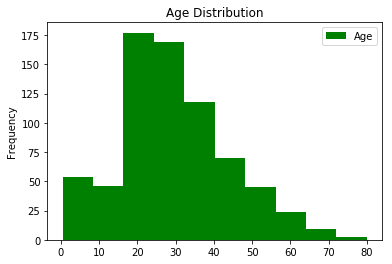

In [454]:
# Age distribution
df.plot.hist(y='Age', color="g", title="Age Distribution")
plt.show()

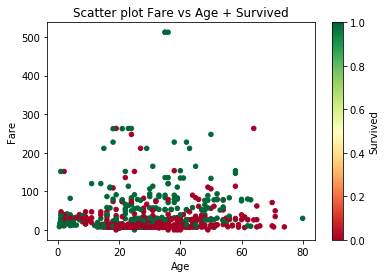

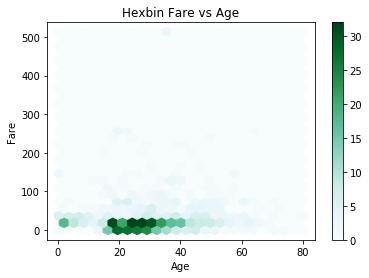

In [457]:
# age vs fare
df.plot.scatter(x='Age', y='Fare', c='Survived', colormap="RdYlGn", sharex=False, title="Scatter plot Fare vs Age + Survived")
df.plot.hexbin(x='Age', y='Fare', gridsize=25, title="Hexbin Fare vs Age", sharex=False)
plt.show()

In [343]:
# Known cabin number impact
print("Of the {} surviving passengers {} of their cabins were known.".format(
    df[(df.Survived == 1)].PassengerId.count(),
    df[(df.Survived == 1) & (df.CabinKnown == "yes")].PassengerId.count()
))
print("Of the {} NOT surviving passengers {} of their cabinsfind
      were known.".format(
    df[(df.Survived == 0)].PassengerId.count(),
    df[(df.Survived == 0) & (df.CabinKnown == "yes")].PassengerId.count()
))

Of the 342 surviving passengers 136 of their cabins were known.
Of the 549 NOT surviving passengers 68 of their cabins were known.


In [470]:
# Gender
print("Gender division:")
print(df.Sex.value_counts(dropna=False))

Gender division:
male      577
female    314
Name: Sex, dtype: int64
